In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import os

In [2]:
df = pd.read_csv("SNPRealTimeVGT - final.csv", index_col=0, na_values=['(NA)']).fillna(0)
df['CPI'] = pd.to_numeric(df['CPI'].astype(str).str.strip(), downcast='float', errors='coerce')
df['Close_SNP'] = pd.to_numeric(df['Close_SNP'].astype(str).str.strip(), downcast='float', errors='coerce')

In [3]:
df.describe()

,Close_SNP,Close_VGT,CPI
count,2162.000000,2164.000000,2162.000000
mean,567.891296,13.508128,0.500118
std,1158.654785,57.839455,1.385552
min,0.000000,0.000000,-0.226851
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,4766.180176,458.170013,8.968371


In [4]:
df.head()

,Close_SNP,Close_VGT,CPI
Date,,,
1/1/10,1073.869995,50.380001,-0.160617
2/1/10,1104.489990,52.650002,-0.120399
3/1/10,1169.430054,56.180000,-0.054216
4/1/10,1186.689941,57.419998,-0.001069
5/1/10,1089.410034,52.830002,0.026482


array([[<Axes: xlabel='Close_SNP', ylabel='Close_SNP'>,
        <Axes: xlabel='Close_VGT', ylabel='Close_SNP'>,
        <Axes: xlabel='CPI', ylabel='Close_SNP'>],
       [<Axes: xlabel='Close_SNP', ylabel='Close_VGT'>,
        <Axes: xlabel='Close_VGT', ylabel='Close_VGT'>,
        <Axes: xlabel='CPI', ylabel='Close_VGT'>],
       [<Axes: xlabel='Close_SNP', ylabel='CPI'>,
        <Axes: xlabel='Close_VGT', ylabel='CPI'>,
        <Axes: xlabel='CPI', ylabel='CPI'>]], dtype=object)

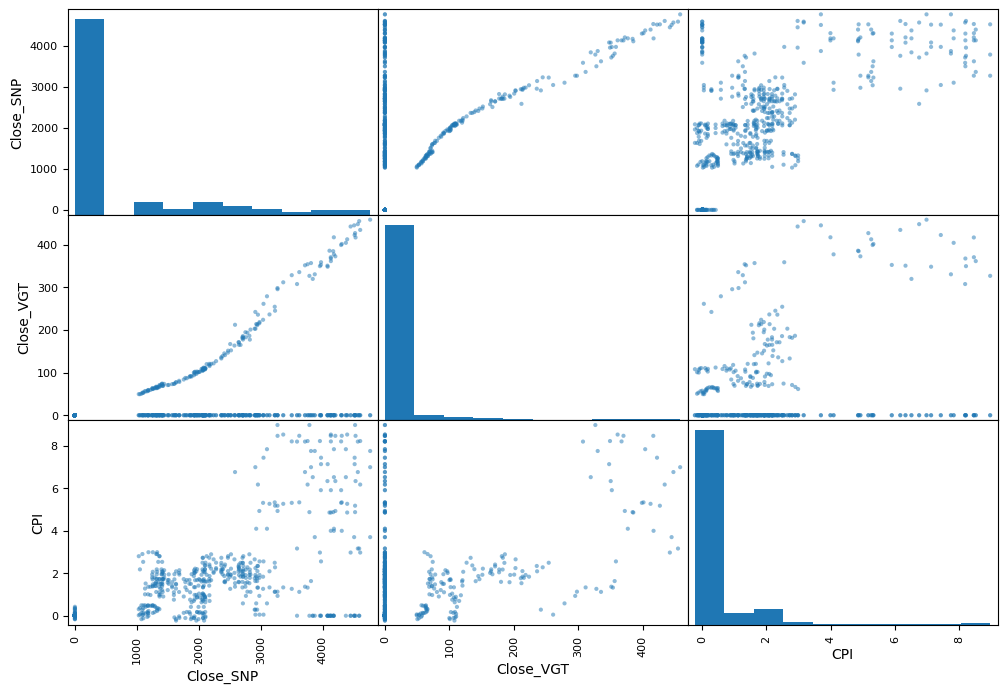

In [5]:
from pandas.plotting import scatter_matrix

corr_matrix = df.corr()
corr_matrix.shape

attributes = ["Close_SNP", "Close_VGT", "CPI"]
scatter_matrix(df[attributes], figsize=(12, 8))

In [6]:
corr_matrix

,Close_SNP,Close_VGT,CPI
Close_SNP,1.000000,0.529819,0.770172
Close_VGT,0.529819,1.000000,0.471658
CPI,0.770172,0.471658,1.000000


<ipython-input-7-05ea97d84075>:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  model.fit(x[:, np.newaxis], y)


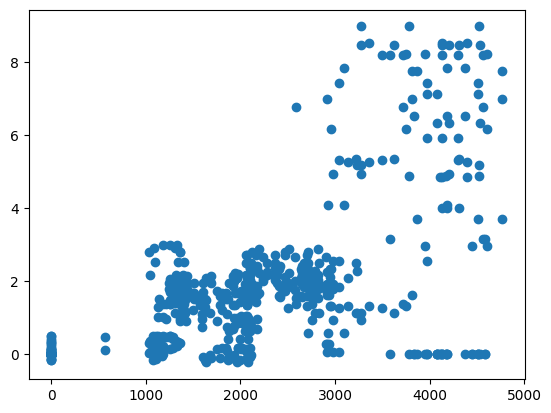

In [7]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
model = LinearRegression(fit_intercept=True)

x = df['Close_SNP'].fillna(value=df['Close_SNP'].mean())
y = df['CPI'].fillna(value=df['CPI'].mean())

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

In [8]:
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:     0.00092087255
Model intercept: -0.022837281


<ipython-input-9-19f64415ae84>:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  model2.fit(x2[:, np.newaxis], y2)


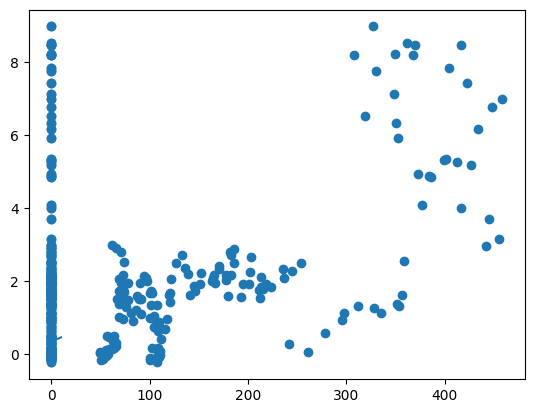

In [9]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
model2 = LinearRegression(fit_intercept=True)

x2 = df['Close_VGT'].fillna(value=df['Close_VGT'].mean())
y2 = df['CPI'].fillna(value=df['CPI'].mean())

model2.fit(x2[:, np.newaxis], y2)

xfit2 = np.linspace(0, 10, 1000)
yfit2 = model2.predict(xfit2[:, np.newaxis])

plt.scatter(x2, y2)
plt.plot(xfit2, yfit2);

In [10]:
print("Model slope:    ", model2.coef_[0])
print("Model intercept:", model2.intercept_)

Model slope:     0.011293112483102932
Model intercept: 0.3475694520347006


In [11]:
df['SNP_AND_VGT'] = df['Close_SNP'] + df['Close_VGT']
df['SNP_AND_VGT']

Date
1/1/10    1124.249996
2/1/10    1157.139992
3/1/10    1225.610054
4/1/10    1244.109939
5/1/10    1142.240036
             ...     
NaN       4169.479980
NaN       4179.830078
NaN       4450.379883
NaN       4588.959961
NaN       4507.660156
Name: SNP_AND_VGT, Length: 2164, dtype: float64

<ipython-input-12-cb5b3dcb35d3>:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  model3.fit(x3[:, np.newaxis], y3)


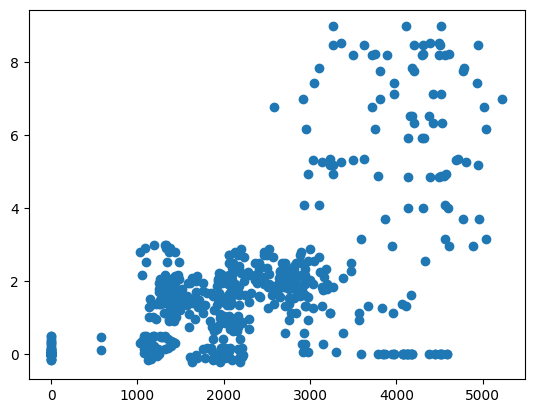

In [12]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
model3 = LinearRegression(fit_intercept=True)

x3 = df['SNP_AND_VGT'].fillna(value=df['SNP_AND_VGT'].mean())
y3 = df['CPI'].fillna(value=df['CPI'].mean())

model3.fit(x3[:, np.newaxis], y3)

xfit3 = np.linspace(0, 10, 1000)
yfit3 = model3.predict(xfit3[:, np.newaxis])

plt.scatter(x3, y3)
plt.plot(xfit3, yfit3);

<ipython-input-13-31728a0c14a2>:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  model4.fit(x4[:, np.newaxis], y4)


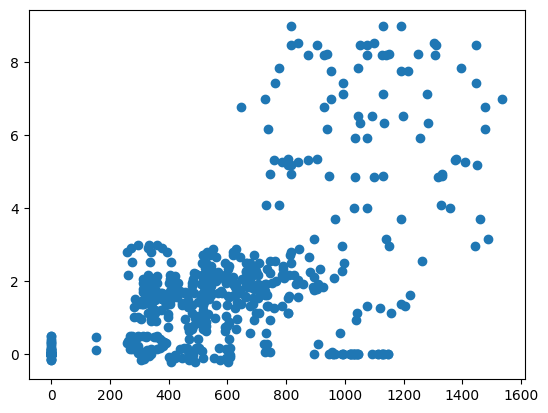

In [13]:
df['SNP_AND_VGT2'] = 0.25*df['Close_SNP'] + 0.75*df['Close_VGT']
df['SNP_AND_VGT2']

model4 = LinearRegression(fit_intercept=True)

x4 = df['SNP_AND_VGT2'].fillna(value=df['SNP_AND_VGT2'].mean())
y4 = df['CPI'].fillna(value=df['CPI'].mean())

model4.fit(x4[:, np.newaxis], y4)

xfit4 = np.linspace(0, 10, 1000)
yfit4 = model4.predict(xfit4[:, np.newaxis])

plt.scatter(x4, y4)
plt.plot(xfit4, yfit4);

<ipython-input-14-67a3b6a9bb5c>:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  model5.fit(x5[:, np.newaxis], y5)


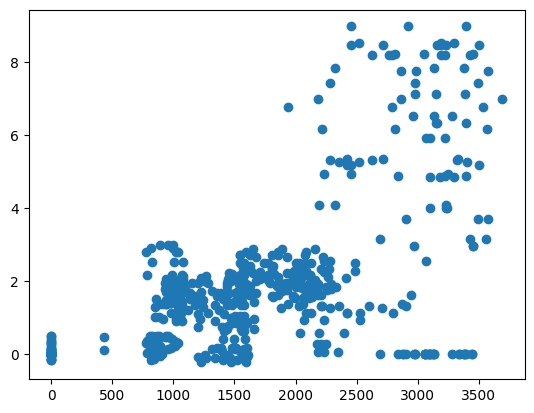

In [14]:
df['SNP_AND_VGT3'] = 0.75*df['Close_SNP'] + 0.25*df['Close_VGT']
df['SNP_AND_VGT3']

model5 = LinearRegression(fit_intercept=True)

x5 = df['SNP_AND_VGT3'].fillna(value=df['SNP_AND_VGT3'].mean())
y5 = df['CPI'].fillna(value=df['CPI'].mean())

model5.fit(x5[:, np.newaxis], y5)

xfit5 = np.linspace(0, 10, 1000)
yfit5 = model5.predict(xfit5[:, np.newaxis])

plt.scatter(x5, y5)
plt.plot(xfit5, yfit5);

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-15-5293a03b7ae5>:10: RuntimeWarning: overflow encountered in exp
  return a * np.exp(b * x) + c


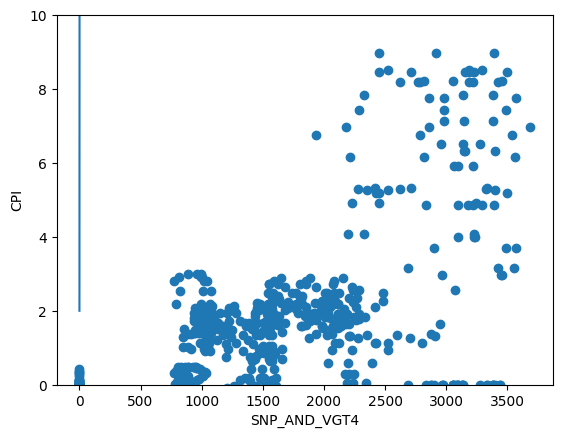

In [15]:
from scipy.optimize import curve_fit
df['SNP_AND_VGT4'] = 0.75*df['Close_SNP'] + 0.25*df['Close_VGT']
df['SNP_AND_VGT4']

# Drop rows with NaN values in the selected columns
df_cleaned = df[['SNP_AND_VGT4', 'CPI']].dropna()

# Define the exponential function
def exponential_func(x, a, b, c):
    return a * np.exp(b * x) + c

# Fit the exponential model to the cleaned data
popt, pcov = curve_fit(exponential_func, df_cleaned['SNP_AND_VGT4'], df_cleaned['CPI'])

# Generate fitted values
xfit6 = np.linspace(df_cleaned['SNP_AND_VGT4'].min(), df_cleaned['SNP_AND_VGT4'].max(), 1000)
yfit6 = exponential_func(xfit6, *popt)

# Plot the data and the fitted curve
plt.scatter(df_cleaned['SNP_AND_VGT4'], df_cleaned['CPI'])
plt.plot(xfit6, yfit6, )
plt.xlabel('SNP_AND_VGT4')
plt.ylabel('CPI')
plt.ylim(0, 10)
plt.show()

In [16]:
#standardscaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)
df = scaler.transform(df)

In [17]:
df = pd.DataFrame(df, columns=['Close_SNP', 'Close_VGT', 'CPI', 'SNP_AND_VGT', 'SNP_AND_VGT2', 'SNP_AND_VGT3', 'SNP_AND_VGT4'])

In [18]:
df

,Close_SNP,Close_VGT,CPI,SNP_AND_VGT,SNP_AND_VGT2,SNP_AND_VGT3,SNP_AND_VGT4
0,0.436796,0.637634,-0.476986,0.456147,0.489730,0.443447,0.443447
1,0.463229,0.676890,-0.447952,0.483785,0.519460,0.470295,0.470295
2,0.519290,0.737935,-0.400175,0.541320,0.579454,0.526866,0.526866
3,0.534190,0.759378,-0.361808,0.556866,0.596118,0.541988,0.541988
4,0.450211,0.680002,-0.341919,0.471265,0.507911,0.457443,0.457443
...,...,...,...,...,...,...,...
2159,3.109141,-0.233599,-0.361036,3.015058,2.828517,3.077801,3.077801
2160,3.118076,-0.233599,-0.361036,3.023755,2.836738,3.086657,3.086657
2161,3.351634,-0.233599,-0.361036,3.251098,3.051635,3.318149,3.318149
2162,3.471266,-0.233599,-0.361036,3.367547,3.161709,3.436724,3.436724


<ipython-input-19-f8129b2bfbc0>:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  model.fit(x[:, np.newaxis], y)


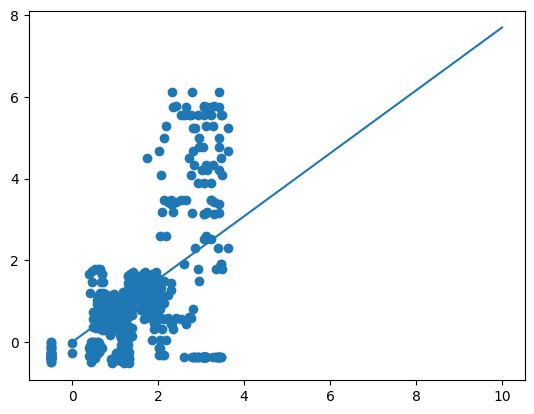

In [19]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
model = LinearRegression(fit_intercept=True)

x = df['Close_SNP'].fillna(value=df['Close_SNP'].mean())
y = df['CPI'].fillna(value=df['CPI'].mean())

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)

<ipython-input-20-4c14213b75ae>:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  model2.fit(x2[:, np.newaxis], y2)


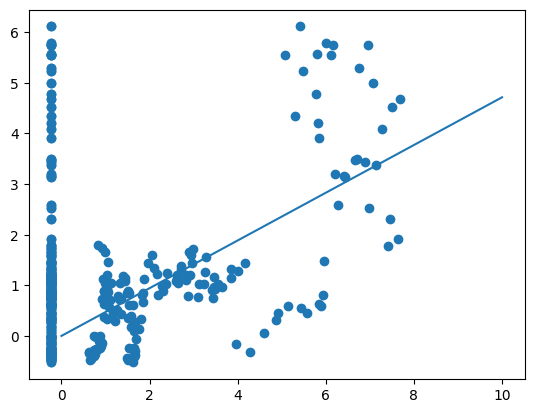

In [20]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
model2 = LinearRegression(fit_intercept=True)

x2 = df['Close_VGT'].fillna(value=df['Close_VGT'].mean())
y2 = df['CPI'].fillna(value=df['CPI'].mean())

model2.fit(x2[:, np.newaxis], y2)

xfit2 = np.linspace(0, 10, 1000)
yfit2 = model2.predict(xfit2[:, np.newaxis])

plt.scatter(x2, y2)
plt.plot(xfit2, yfit2)

<ipython-input-21-5e0d0826aab7>:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  model5.fit(x5[:, np.newaxis], y5)


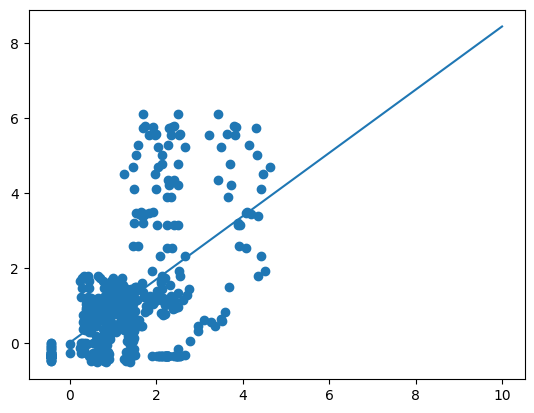

In [21]:
df['SNP_AND_VGT3'] = 0.75*df['Close_SNP'] + 0.25*df['Close_VGT']
df['SNP_AND_VGT3']

model5 = LinearRegression(fit_intercept=True)

x5 = df['SNP_AND_VGT3'].fillna(value=df['SNP_AND_VGT3'].mean())
y5 = df['CPI'].fillna(value=df['CPI'].mean())

model5.fit(x5[:, np.newaxis], y5)

xfit5 = np.linspace(0, 10, 1000)
yfit5 = model5.predict(xfit5[:, np.newaxis])

plt.scatter(x5, y5)
plt.plot(xfit5, yfit5)